## Cargar el conjunto mnist y mostrar una intancia

**Cargar tensorflow, numpy  y matplotlib **

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

* **importar** `input_data` **de** `tensorflow.examples.tutorials.mnist`

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

**Cargar los conjuntos de datos de *mnist* desde la carpeta 
que se entrega durante el examen **

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
imagentest1=mnist.test.images[0]

* **Mostrar  la imagen 0 del conjunto de prueba usando imshow (+1.0)**

(verifique las dimensiones de la imagen antes de mostrarla)

In [5]:
imagentest1.shape

(784,)

In [6]:
imagentest1=imagentest1.reshape((28,28))

In [7]:
imagentest1.shape

(28, 28)

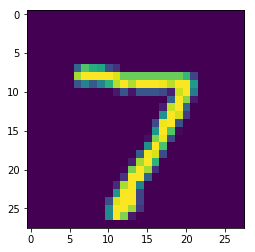

In [8]:
plt.imshow(imagentest1)

In [9]:
mnist.test.labels[0].shape

(10,)

## Creación de un modelo

** En este espacio deberás crear un modelo de la forma ** (+2.0)

$$ y = xW+b $$ 

Donde 

*  **x** es un `placeholder` de tipo `tf.float32` y forma `[None, 784]`
* **W** es una `Variable` inicializada con  una matriz de `tf.zeros` de `[784,10]`
* **b**  es una `Variable` inicializada con un vector `tf.zeros` de 10 elementos

In [10]:
batch_size = 8

In [11]:
x=tf.placeholder(tf.float32,(None,784))

In [12]:
m = tf.Variable(tf.zeros((784,10)))


In [13]:
b = tf.Variable(tf.zeros((1,10)))

** indicar con un `placeholder` la salida real (y_real) **

los parámetros de entrada son de tipo `float32` y `[None, 10]`

In [14]:
y_real = tf.placeholder(tf.float32,(None,10))

In [15]:
y_model = tf.matmul(x,m)+b

** Usar `reduce_mean` con los parámetros `tf.nn.softmax_cross_entropy_with_logits()` ** 

Los parámetros para softmax... son
* Las etiquetas son `y_real` (punto anterior)
* y logits es la respuesta obtenida por el modelo `y`

In [16]:
error=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_model,labels=y_real))

** usar `GradientDescentOptimizer` con una tasa de aprendizaje de 0.05 **

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

** realizar el entrenamiento .... **

In [18]:
train = optimizer.minimize(error)

In [19]:
init = tf.global_variables_initializer()

## Creación de la sesión y ejecución del modelo ...

(+2.0)

In [24]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        x_batch, y_batch = mnist.train.next_batch(100)
        
        feed = {x:x_batch,y_real:y_batch}
        
        sess.run(train,feed_dict=feed)
    respuesta = tf.equal(tf.argmax(y_model,1),tf.argmax(y_real,1))
    aciertos = tf.reduce_mean(tf.cast(respuesta,tf.float32))
    print(sess.run(aciertos,feed_dict={x:mnist.test.images,y_real:mnist.test.labels}))
        
    #model_m,model_b = sess.run([m,b])

0.8994


* Durante la sesion, para generar un conjunto para entrenar por lotes, 
usar la función `mnist.train.next_batch()` que recibe como parámetros 
una cantidad entera de elementos que serán entregadas en una pareja
**`x_batch, y_batch`**. Usar 100 elementos como tamaño del lote.

* para el entrenamiento de la sesión hacer 1000 entrenamientos y mostrar resultados

Dentro de la sesión (después de las  1000 iteraciones de entrenamiento), agregar el siguiente fragmento de código para calcular el rendimiento del modelo:

In [21]:
#respuesta = tf.equal(tf.argmax(y,1),tf.argmax(y_real,1))
#aciertos = tf.reduce_mean(tf.cast(respuesta,tf.float32))
#print(ss.run(aciertos,feed_dict={x:mnist.test.images,y_real:mnist.test.labels}))